In [1]:
from train import *
from processing import find_estado_with_value_two
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import numpy as np
import pandas as pd
import xgboost as xgb
import random
import shap
pd.set_option('display.max_columns', None)
random.seed(10)


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
df = build_dataset_with_features(categorical_features= False)
train, val, test = train_test_val_split(df)

IndexError: index 0 is out of bounds for axis 0 with size 0

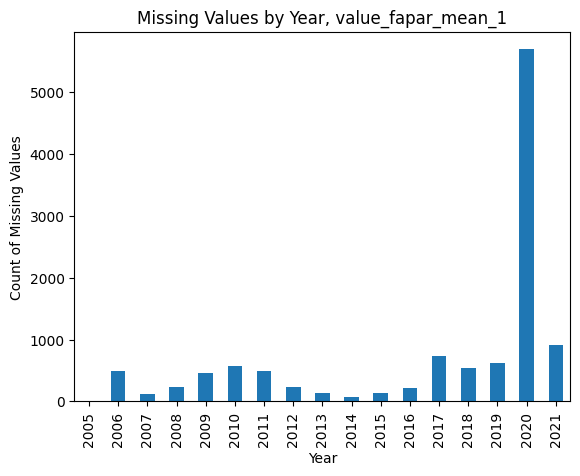

In [25]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'value_fapar_std_1' is the column of interest
df['year'] = df['fecha'].dt.year

# Count missing values for 'value_fapar_std_1' for each month
missing_values_by_month = df.groupby('year')['value_fapar_mean_1'].apply(lambda x: x.isnull().sum())

# Plotting the counts of missing values for each month
missing_values_by_month.plot(kind='bar', xlabel='Year', ylabel='Count of Missing Values', title='Missing Values by Year, value_fapar_mean_1')
plt.show()


In [51]:
df = load_climatic_features()
df.fecha = pd.to_datetime(df.fecha)
df.sort_values(by="fecha")
df['year'] = df['fecha'].dt.year
#df = df[df['year'] == 2019]
#df[df['value_fapar_mean_1'].isnull() & df['stl1_min_1'].notna()]
#df[df['codparcela'] == '025-00067-01-00']
df[df['value_fapar_mean_1'].notna()]

,codparcela,fecha,stl1_min_1,stl1_max_1,stl1_mean_1,stl1_median_1,stl1_std_1,tp_min_1,tp_max_1,tp_mean_1,tp_median_1,tp_std_1,swvl1_min_1,swvl1_max_1,swvl1_mean_1,swvl1_median_1,swvl1_std_1,u10_min_1,u10_max_1,u10_mean_1,u10_median_1,u10_std_1,v10_min_1,v10_max_1,v10_mean_1,v10_median_1,v10_std_1,ssr_min_1,ssr_max_1,ssr_mean_1,ssr_median_1,ssr_std_1,stl1_min_2,stl1_max_2,stl1_mean_2,stl1_median_2,stl1_std_2,tp_min_2,tp_max_2,tp_mean_2,tp_median_2,tp_std_2,swvl1_min_2,swvl1_max_2,swvl1_mean_2,swvl1_median_2,swvl1_std_2,u10_min_2,u10_max_2,u10_mean_2,u10_median_2,u10_std_2,v10_min_2,v10_max_2,v10_mean_2,v10_median_2,v10_std_2,ssr_min_2,ssr_max_2,ssr_mean_2,ssr_median_2,ssr_std_2,stl1_min_3,stl1_max_3,stl1_mean_3,stl1_median_3,stl1_std_3,tp_min_3,tp_max_3,tp_mean_3,tp_median_3,tp_std_3,swvl1_min_3,swvl1_max_3,swvl1_mean_3,swvl1_median_3,swvl1_std_3,u10_min_3,u10_max_3,u10_mean_3,u10_median_3,u10_std_3,v10_min_3,v10_max_3,v10_mean_3,v10_median_3,v10_std_3,ssr_min_3,ssr_max_3,ssr_mean_3,ssr_median_3,ssr_std_3,stl1_min_4,stl1_max_4,stl1_mean_4,stl1_median_4,stl1_std_4,tp_min_4,tp_max_4,tp_mean_4,tp_median_4,tp_std_4,swvl1_min_4,swvl1_max_4,swvl1_mean_4,swvl1_median_4,swvl1_std_4,u10_min_4,u10_max_4,u10_mean_4,u10_median_4,u10_std_4,v10_min_4,v10_max_4,v10_mean_4,v10_median_4,v10_std_4,ssr_min_4,ssr_max_4,ssr_mean_4,ssr_median_4,ssr_std_4,value_ndvi_min_1,value_ndvi_max_1,value_ndvi_mean_1,value_ndvi_median_1,value_ndvi_std_1,value_fapar_min_1,value_fapar_max_1,value_fapar_mean_1,value_fapar_median_1,value_fapar_std_1,year
613,045-00002-01-1,2012-03-28,271.468933,292.148193,284.029236,284.103455,4.952887,1.862645e-09,0.001905,0.000244,1.461005e-05,0.000507,0.159336,0.178243,0.168388,0.168452,0.005361,-2.297482,0.927107,-0.949667,-1.033338,0.620232,-4.260909,4.728573,1.319191,1.949821,2.033793,0.0,12986467.0,3543663.00,3173483.750,3466772.25,271.512238,292.128326,283.081970,282.876282,5.477686,1.862645e-09,0.000274,0.000009,1.862645e-09,0.000033,0.157773,0.174929,0.165713,0.165806,0.004719,-1.378153,2.467885,-0.069004,-0.245038,0.947095,-2.581780,3.486104,0.513296,1.016656,1.652797,0.0,12948749.0,3363495.75,3525776.00,3380826.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.292,0.292,0.292000,0.292,NaN,0.192,0.192,0.192000,0.192,NaN,2012
614,045-00002-01-1,2012-04-03,271.468933,292.213837,283.814575,283.908783,5.422783,1.862645e-09,0.006713,0.000513,1.461005e-05,0.001423,0.156542,0.253161,0.170641,0.164694,0.019499,-2.297482,2.580815,-0.578479,-0.885253,0.995246,-0.666183,3.992965,1.507657,1.352999,1.210205,0.0,12955560.0,3142570.00,2111090.000,3436551.25,271.926056,292.095703,284.027069,284.161621,4.747024,1.862645e-09,0.001905,0.000278,1.743436e-06,0.000534,0.157773,0.178243,0.166662,0.165532,0.006221,-2.246117,0.927107,-0.776381,-0.843030,0.666928,-4.260909,4.728573,0.931581,1.697803,2.105817,0.0,12986467.0,3513327.50,3173483.75,3504870.75,271.512238,292.128326,283.155243,282.876282,5.551005,1.862645e-09,0.000056,0.000006,8.717179e-07,0.000016,0.160148,0.174929,0.166966,0.166661,0.004116,-1.378153,2.467885,-0.048360,-0.359930,1.017432,-2.581780,3.486104,0.534805,0.980775,1.720362,0.0,12948749.0,3386571.75,3525776.00,3406659.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.288,0.292,0.290000,0.290,0.002828,0.192,0.204,0.198000,0.198,0.008485,2012
615,045-00002-01-1,2012-04-11,271.387299,292.091431,283.909607,284.135315,4.622191,1.862645e-09,0.004733,0.000641,5.243631e-05,0.001130,0.214429,0.298196,0.262021,0.266328,0.022937,-1.292487,5.617748,1.043343,0.798075,1.530582,-1.577528,2.660522,0.292972,0.226515,0.893933,0.0,12704682.0,3482964.00,2010221.375,3599522.75,271.711517,292.213837,283.844116,283.718323,5.376254,1.862645e-09,0.006713,0.000584,1.435792e-05,0.001508

In [23]:
df.isnull().sum() / 

codparcela                  0
fecha                       0
stl1_min_1               2494
stl1_max_1               2494
stl1_mean_1              2494
                        ...  
value_fapar_mean_1      11684
value_fapar_median_1    11684
value_fapar_std_1       14054
month                       0
year                        0
Length: 134, dtype: int64

In [3]:
x_train, y_train = split_into_x_y(train)
x_test, y_test = split_into_x_y(test)
x_val, y_val = split_into_x_y(val)

In [4]:

def get_metrics_train_val(model, name, print_metrics=True):
    y_pred_train = model.predict(x_train)
    y_pred_val = model.predict(x_val)
    
    train_mse = round(metrics.mean_squared_error(y_train, y_pred_train), 2)
    val_mse = round(metrics.mean_squared_error(y_val, y_pred_val), 2)
    val_mse_discrete = round(mse_score_discrete(y_val, y_pred_val), 2)

    if print_metrics:
        print('Train MSE {}: {}'.format(name, train_mse))
        print('Validation MSE {}: {}'.format(name, val_mse))
        print('Validation MSE Discrete {}: {}'.format(name, val_mse_discrete))


    return train_mse, val_mse, val_mse_discrete


In [5]:
baseline_train_pred = [0] * len(x_train)
baseline_val_pred = [0] * len(x_val)
print('Train MSE baseline: {}'.format(metrics.mean_squared_error(y_train, baseline_train_pred)))
print('Validation MSE baseline: {}'.format(metrics.mean_squared_error(y_val, baseline_val_pred)))
print('Validation MSE discrete baseline: {}'.format(mse_score_discrete(y_val, baseline_val_pred)))

Train MSE baseline: 1.1101813515880787
Validation MSE baseline: 1.063456548065279
Validation MSE discrete baseline: 1.063456548065279


In [6]:
basic_reg_model = Pipeline([
    ('scaler', StandardScaler()), 
    ('regressor', LinearRegression()) 
])

basic_reg_model.fit(x_train, y_train)

get_metrics_train_val(basic_reg_model, "Linear Regression")

coefficients = basic_reg_model.named_steps['regressor'].coef_

print("\n Coefficients:")
for feature, coef in zip(x_train.columns, coefficients):
    print(f"{feature}: {round(coef,4)}")

Train MSE Linear Regression: 0.34
Validation MSE Linear Regression: 0.35
Validation MSE Discrete Linear Regression: 0.44

 Coefficients:
104_altitud_(m): -0.0013
201_superf_cultivada_en_la_parcela_agrícola_(ha): 0.0053
202_pendiente_(%): 0.0046
301_marco_(m_x_m): 0.0005
302_densidad_(plantas/ha): -0.0018
303_nº_pies_por_árbol: 0.0035
porcentaje_floracion: 0.0026
211_utilización_de_cubierta_vegetal: -0.0028
208_riego:_procedencia_del_agua: -0.0027
207_riego:_sistema_usual_de_riego: 0.0012
109_sistema_para_el_cumplimiento_gestión_integrada: 0.004
estado_fenologico_1: 0.0778
estado_fenologico_2: 0.0975
estado_fenologico_3: 0.2015
estado_fenologico_4: 0.2523
estado_fenologico_5: 0.2037
estado_fenologico_6: 0.1807
estado_fenologico_7: 0.2312
estado_fenologico_8: 0.082
estado_fenologico_9: 0.0352
estado_fenologico_10: -0.058
estado_fenologico_11: 0.13
estado_fenologico_12: 0.0298
estado_fenologico_13: 0.0029
estado_fenologico_14: -0.0037
number_days_current_estado: 0.0729


In [7]:
def run_ridge_models():
    param_grid = [0.001, 0.01, 0.1, 1, 10, 100]
    
    for alpha in param_grid:
        reg_model = Pipeline([
        ('scaler', StandardScaler()), 
        ('regressor', Ridge(alpha=alpha))])

        reg_model.fit(x_train, y_train)
        
        get_metrics_train_val(reg_model, f"Ridge (alpha = {alpha})")

run_ridge_models()

Train MSE Ridge (alpha = 0.001): 0.34
Validation MSE Ridge (alpha = 0.001): 0.35
Validation MSE Discrete Ridge (alpha = 0.001): 0.44
Train MSE Ridge (alpha = 0.01): 0.34
Validation MSE Ridge (alpha = 0.01): 0.35
Validation MSE Discrete Ridge (alpha = 0.01): 0.44
Train MSE Ridge (alpha = 0.1): 0.34
Validation MSE Ridge (alpha = 0.1): 0.35
Validation MSE Discrete Ridge (alpha = 0.1): 0.44
Train MSE Ridge (alpha = 1): 0.34
Validation MSE Ridge (alpha = 1): 0.35
Validation MSE Discrete Ridge (alpha = 1): 0.44
Train MSE Ridge (alpha = 10): 0.34
Validation MSE Ridge (alpha = 10): 0.35
Validation MSE Discrete Ridge (alpha = 10): 0.44
Train MSE Ridge (alpha = 100): 0.34
Validation MSE Ridge (alpha = 100): 0.35
Validation MSE Discrete Ridge (alpha = 100): 0.44


In [8]:
def run_ridge_models():
    param_grid = [0.001, 0.01, 0.1, 1, 10, 100]
    
    for alpha in param_grid:
        reg_model = Pipeline([
        ('scaler', StandardScaler()), 
        ('regressor', Lasso(alpha=alpha))])

        reg_model.fit(x_train, y_train)
        
        get_metrics_train_val(reg_model, f"Ridge (alpha = {alpha})")

run_ridge_models()

Train MSE Ridge (alpha = 0.001): 0.34
Validation MSE Ridge (alpha = 0.001): 0.34
Validation MSE Discrete Ridge (alpha = 0.001): 0.44
Train MSE Ridge (alpha = 0.01): 0.35
Validation MSE Ridge (alpha = 0.01): 0.33
Validation MSE Discrete Ridge (alpha = 0.01): 0.43
Train MSE Ridge (alpha = 0.1): 0.4
Validation MSE Ridge (alpha = 0.1): 0.37
Validation MSE Discrete Ridge (alpha = 0.1): 0.51
Train MSE Ridge (alpha = 1): 0.67
Validation MSE Ridge (alpha = 1): 0.64
Validation MSE Discrete Ridge (alpha = 1): 0.76
Train MSE Ridge (alpha = 10): 0.67
Validation MSE Ridge (alpha = 10): 0.64
Validation MSE Discrete Ridge (alpha = 10): 0.76
Train MSE Ridge (alpha = 100): 0.67
Validation MSE Ridge (alpha = 100): 0.64
Validation MSE Discrete Ridge (alpha = 100): 0.76


### Random Forest

In [9]:
n_trees_grid = [5,25,50]

for n_trees in n_trees_grid:
    rf = RandomForestRegressor(n_estimators=n_trees)
    rf.fit(x_train, y_train)
    get_metrics_train_val(rf,f"Random Forest Regressor (n_trees = {n_trees})")


Train MSE Random Forest Regressor (n_trees = 5): 0.14
Validation MSE Random Forest Regressor (n_trees = 5): 0.31
Validation MSE Discrete Random Forest Regressor (n_trees = 5): 0.37
Train MSE Random Forest Regressor (n_trees = 25): 0.13
Validation MSE Random Forest Regressor (n_trees = 25): 0.29
Validation MSE Discrete Random Forest Regressor (n_trees = 25): 0.35
Train MSE Random Forest Regressor (n_trees = 50): 0.13
Validation MSE Random Forest Regressor (n_trees = 50): 0.28
Validation MSE Discrete Random Forest Regressor (n_trees = 50): 0.34


In [10]:
learning_rates = [0.001, 0.01, 0.1, 1]
depths = [1, 5, 10]
n_trees = [5, 25, 50, 100]
best_score = np.inf

for lr in learning_rates:
    for depth in depths:
        for trees in n_trees:
            xgb_model = xgb.XGBRegressor(objective='reg:squarederror', booster='gbtree', learning_rate=lr, max_depth=depth, n_estimators=trees, random_state=1)
            xgb_model.fit(x_train, y_train)
            train_mse, val_mse, val_mse_discrete = get_metrics_train_val(xgb_model,f'Learning rate: {lr}, max_depth: {depth}, n_estimators: {trees}',print_metrics=False)
            if val_mse < best_score:
                best_scores = {'train_mse': train_mse,'val_mse': val_mse, 'val_mse_discrete': val_mse_discrete}
                best_params = {'learning_rate': lr,'max_depth': depth, 'n_trees': trees}

print(best_params)
print(best_scores)

{'learning_rate': 1, 'max_depth': 10, 'n_trees': 100}
{'train_mse': 0.15, 'val_mse': 0.35, 'val_mse_discrete': 0.4}


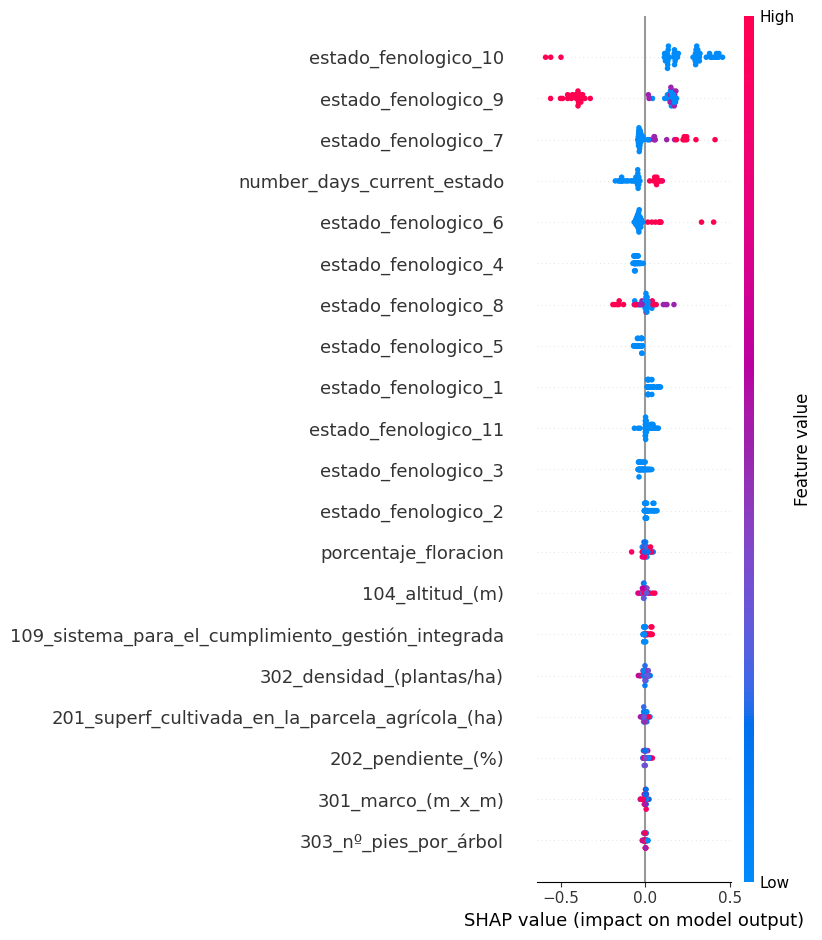

In [11]:
explainer = shap.Explainer(rf)
shap_values = explainer.shap_values(x_val[:50])
shap.summary_plot(shap_values, x_val[:50])

In [19]:
y_pred = rf.predict(x_test)
y_pred_rounded = []

for pred in y_pred:
    if pred - int(pred) < 0.5:
        y_pred_rounded.append(max(0, math.floor(pred)))
    else:
        y_pred_rounded.append(max(0, math.ceil(pred)))

y_final = y_test - y_pred_rounded

print(y_final.value_counts())
print(y_test.value_counts())
print(pd.Series(y_pred_rounded).value_counts())

next_y
 0    31685
-1     5575
 1     4617
-2      465
 2      223
 3       28
-3       13
 4        4
 7        1
 5        1
Name: count, dtype: int64
next_y
0    25571
1    13629
2     3035
3      350
4       21
5        3
6        2
8        1
Name: count, dtype: int64
0    25497
1    12244
2     4621
3      249
4        1
Name: count, dtype: int64


### With Categorical Features

In [12]:
df = build_dataset_with_features(climate_features=False)

,codparcela,fecha,next_y,104_altitud_(m),201_superf_cultivada_en_la_parcela_agrícola_(ha),202_pendiente_(%),301_marco_(m_x_m),302_densidad_(plantas/ha),303_nº_pies_por_árbol,porcentaje_floracion,campaña,105_comarca,203_orientación,204_textura_del_suelo,206_secano_/_regadío,212_tipo_de_cubierta_vegetal,304_formación,308_variedad_principal,120_zona_biológica_raif,310_patrón_variedad_principal,211_utilización_de_cubierta_vegetal,208_riego:_procedencia_del_agua,207_riego:_sistema_usual_de_riego,109_sistema_para_el_cumplimiento_gestión_integrada,estado_fenologico_1,estado_fenologico_2,estado_fenologico_3,estado_fenologico_4,estado_fenologico_5,estado_fenologico_6,estado_fenologico_7,estado_fenologico_8,estado_fenologico_9,estado_fenologico_10,estado_fenologico_11,estado_fenologico_12,estado_fenologico_13,estado_fenologico_14,number_days_current_estado
0,011-00001-00-00,2005-08-31,0,530,14.200000,3,12.0,69,3,95,2005,NORTE O ANTEQUERA,N,FRANCO,REGADIO,SILVESTRE,FORMACION,HOJIBLANCA,MA/OL/04 ANTEQUERA-NORTE,SIN DEFINIR,1,1,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0.0
1,110-00004-00-00,2005-08-31,0,480,99.940002,2,12.0,69,3,85,2005,NORTE O ANTEQUERA,S,FRANCO,SECANO,SILVESTRE,FORMACION,HOJIBLANCA,MA/OL/04 ANTEQUERA-NORTE,SIN DEFINIR,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0.0
2,128-00013-00-00,2005-08-31,0,500,42.209999,3,12.0,69,69,95,2005,NORTE O ANTEQUERA,SE,FRANCO,REGADIO,SIN DEFINIR,FORMACION,HOJIBLANCA,MA/OL/04 ANTEQUERA-NORTE,SIN DEFINIR,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0.0
3,166-00500-00-00,2005-08-31,0,640,35.000000,10,7.0,204,1,15,2005,NORTE O ANTEQUERA,SO,FRANCO-ARCILLOSO,RIEGO DE APOYO,SILVESTRE,FORMACION,PICUAL,MA/OL/04 ANTEQUERA-NORTE,SIN DEFINIR,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0.0
4,011-00001-00-00,2005-09-06,0,530,14.200000,3,12.0,69,3,95,2005,NORTE O ANTEQUERA,N,FRANCO,REGADIO,SILVESTRE,FORMACION,HOJIBLANCA,MA/OL/04 ANTEQUERA-NORTE,SIN DEFINIR,1,1,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442308,001-00033-02-00,2021-03-17,1,565,11.570000,9,6.0,138,2,5,2021,ESTEPA,SIN DEFINIR,SIN DEFINIR,REGADIO,SILVESTRE,SIN DEFINIR,HOJIBLANCA,SE/OL/01 ESTEPA NORTE,SIN DEFINIR,1,0,1,1,0,1,2,1,0,0,0,0,0,0,0,0,0,0,0.0
442309,004-00017-01-00,2021-03-17,1,565,1.330000,9,6.0,138,2,0,2021,ESTEPA,SIN DEFINIR,SIN DEFINIR,REGADIO,SILVESTRE,SIN DEFINIR,HOJIBLANCA,SE/OL/01 ESTEPA NORTE,SIN DEFINIR,1,0,1,1,0,1,2,1,0,0,0,0,0,0,0,0,0,0,0.0
442310,005-00126-01-02,2021-03-17,1,565,38.535000,9,12.0,149,3,1,2021,ESTEPA,SIN DEFINIR,SIN DEFINIR,SECANO,SILVESTRE,SIN DEFINIR,HOJIBLANCA,SE/OL/02 ESTEPA SUR,SIN DEFINIR,1,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,6.0
442311,003-00014-01-01,2021-03-17,1,308,2.100000,9,10.0,100,3,1,2021,ESTEPA,SIN DEFINIR,SIN DEFINIR,REGADIO,SILVESTRE,SIN DEFINIR,HOJIBLANCA,SE/OL/01 ESTEPA NORTE,SIN DEFINIR,1,0,1,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0.0


In [19]:
train, val, test = train_test_val_split(df)
x_train, y_train = split_into_x_y(train)
x_test, y_test = split_into_x_y(test)
x_val, y_val = split_into_x_y(val)

In [27]:
categorical_columns = [
        "campaña",
        "105_comarca",
        "203_orientación",
        "204_textura_del_suelo",
        "206_secano_/_regadío",
        "212_tipo_de_cubierta_vegetal",
        "304_formación",
        "308_variedad_principal",
        "120_zona_biológica_raif",
        "310_patrón_variedad_principal",
    ]
df[categorical_columns] = df[categorical_columns].astype("category")
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Display the resulting DataFrame with one-hot encoding
train, val, test = train_test_val_split(df_encoded)
x_train, y_train = split_into_x_y(train)
x_test, y_test = split_into_x_y(test)
x_val, y_val = split_into_x_y(val)

for n_trees in n_trees_grid:
    rf = RandomForestRegressor(n_estimators=n_trees)
    rf.fit(x_train, y_train)
    get_metrics_train_val(rf,f"Random Forest Regressor (n_trees = {n_trees})")
# df.drop()

Train MSE Random Forest Regressor (n_trees = 5): 0.08
Validation MSE Random Forest Regressor (n_trees = 5): 0.3
Validation MSE Discrete Random Forest Regressor (n_trees = 5): 0.35
Train MSE Random Forest Regressor (n_trees = 25): 0.07
Validation MSE Random Forest Regressor (n_trees = 25): 0.27
Validation MSE Discrete Random Forest Regressor (n_trees = 25): 0.32
Train MSE Random Forest Regressor (n_trees = 50): 0.06
Validation MSE Random Forest Regressor (n_trees = 50): 0.27
Validation MSE Discrete Random Forest Regressor (n_trees = 50): 0.32


In [29]:
learning_rates = [0.01, 0.1, 1]
depths = [5, 10, 25, 50]
n_trees = [25, 50, 100]
best_score = np.inf

for lr in learning_rates:
    for depth in depths:
        for trees in n_trees:
            xgb_model = xgb.XGBRegressor(objective='reg:squarederror', booster='gbtree', learning_rate=lr, max_depth=depth, n_estimators=trees, random_state=1)
            xgb_model.fit(x_train, y_train)
            train_mse, val_mse, val_mse_discrete = get_metrics_train_val(xgb_model,f'Learning rate: {lr}, max_depth: {depth}, n_estimators: {trees}',print_metrics=False)
            if val_mse < best_score:
                best_scores = {'train_mse': train_mse,'val_mse': val_mse, 'val_mse_discrete': val_mse_discrete}
                best_params = {'learning_rate': lr,'max_depth': depth, 'n_trees': trees}

print(best_params)
print(best_scores)

{'learning_rate': 1, 'max_depth': 50, 'n_trees': 100}
{'train_mse': 0.04, 'val_mse': 0.38, 'val_mse_discrete': 0.42}
